In [14]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
import zipfile

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Extract the zip file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Combine Cancer-Non Cancer.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/OSCC_dataset")
zip_ref.close()

**Alzheimers image process**

In [ ]:
# Path to the HC folder containing images
demo_folder_path = "/content/drive/MyDrive/Systems Files/Alzheimer_s Dataset/test/VeryMildDemented"

# Path to the directory to save processed HC images
processed_demo_folder_path = "/content/drive/MyDrive/Systems Files/Processed_Alzheimer's_dataset/tesi/VeryMild_demented"

# Create the directory if it doesn't exist
os.makedirs(processed_demo_folder_path, exist_ok=True)

count = 0

# Iterate through each image in the HC folder
for image_filename in os.listdir(demo_folder_path):
        image_path = os.path.join(demo_folder_path, image_filename)

        # Load the image
        image = cv2.imread(image_path)

        new_width = 176  # New width in pixels
        new_height = 208  # New height in pixels
        resized_image = cv2.resize(image[:new_height, :new_width], (new_width, new_height))
        image_size = resized_image.shape
        #print(image_size)

        #resized_image = cv2.resize(image, (256, 256))

        # Full process in steps to ensure clarity
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        roi_image = image[y:y+h, x:x+w]

        new_width = 176  # New width in pixels
        new_height = 208  # New height in pixels
        roi_resized_image = cv2.resize(roi_image[:new_height, :new_width], (new_width, new_height))
        image_size = roi_resized_image.shape
        #print(image_size)

        #applying clahe

# Check if the image is grayscale or color
        if len(roi_resized_image.shape) == 2:  # Grayscale image
    # Create a CLAHE object
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    # Apply CLAHE to the grayscale image
            clahe_image = clahe.apply(roi_resized_image)
        else:  # Color image
    # Convert the color image to LAB color space
            lab_image = cv2.cvtColor(roi_resized_image, cv2.COLOR_RGB2Lab)
    # Split the LAB image into L, A, and B channels
            l, a, b = cv2.split(lab_image)
    # Create a CLAHE object
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    # Apply CLAHE to the L channel
            l_clahe = clahe.apply(l)
    # Merge the CLAHE enhanced L channel with A and B channels
            lab_clahe = cv2.merge((l_clahe, a, b))
    # Convert the LAB image back to RGB color space
            clahe_image = cv2.cvtColor(lab_clahe, cv2.COLOR_Lab2RGB)

        new_width = 176  # New width in pixels
        new_height = 208  # New height in pixels
        resized_image = cv2.resize(clahe_image[:new_height, :new_width], (new_width, new_height))
        image_size = resized_image.shape
        #print(image_size)


        #intensity normalization
        #normalized_image = (image - np.mean(image)) / np.std(image)



        # Optional: Apply Canny edge detection on the ROI
        roi_gray = cv2.cvtColor(clahe_image, cv2.COLOR_RGB2GRAY)
        roi_blurred = cv2.GaussianBlur(roi_gray, (5, 5), 0)
        edges_roi = cv2.Canny(roi_blurred, 100, 200)

        new_width = 176  # New width in pixels
        new_height = 208  # New height in pixels
        resized_image = cv2.resize(edges_roi[:new_height, :new_width], (new_width, new_height))
        image_size = resized_image.shape
        #print(image_size)

        #combine the images of roiimage and resized image(after applying Canny)

        # Convert the edge-detected image to a 3-channel image
        edge_detected_image_3ch = cv2.cvtColor( resized_image, cv2.COLOR_GRAY2BGR)
        # Define the transparency factor for blending
        alpha = 0.5
        # Combine the original and edge-detected images using weighted addition
        combined_image = cv2.addWeighted(roi_resized_image, 1 - alpha, edge_detected_image_3ch, alpha, 0)




        # Save the processed image with the same name
        processed_image_path = os.path.join(processed_demo_folder_path, image_filename)
        cv2.imwrite(processed_image_path, combined_image)

        # Display the final image
        #cv2_imshow(final_image)

        count = count + 1
        print(count)

print("Processing and saving HC images complete.")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
# Path to the HC folder containing images
demo_folder_path = "/content/drive/MyDrive/Systems Files/Check_image"

# Path to the directory to save processed HC images
processed_demo_folder_path = "/content/drive/MyDrive/Systems Files/Processed_image"

# Create the directory if it doesn't exist
os.makedirs(processed_demo_folder_path, exist_ok=True)

count = 0

# Iterate through each image in the HC folder
for image_filename in os.listdir(demo_folder_path):
        image_path = os.path.join(demo_folder_path, image_filename)

        # Load the image
        image = cv2.imread(image_path)

        new_width = 176  # New width in pixels
        new_height = 208  # New height in pixels
        resized_image = cv2.resize(image[:new_height, :new_width], (new_width, new_height))
        image_size = resized_image.shape
        print(image_size)

        #resized_image = cv2.resize(image, (256, 256))

        # Full process in steps to ensure clarity
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        roi_image = image[y:y+h, x:x+w]

        new_width = 176  # New width in pixels
        new_height = 208  # New height in pixels
        resized_image = cv2.resize(roi_image[:new_height, :new_width], (new_width, new_height))
        image_size = resized_image.shape
        print(image_size)



        # Save the processed image with the same name
        processed_image_path = os.path.join(processed_demo_folder_path, image_filename)
        cv2.imwrite(processed_image_path, resized_image)

        # Display the final image
        #cv2_imshow(final_image)

        count = count + 1
        print(count)

print("Processing and saving HC images complete.")

(208, 176, 3)
(208, 176, 3)
1
Processing and saving HC images complete.


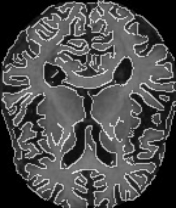

True

In [ ]:
import cv2
import numpy as np

# Load the original image and the edge-detected image
original_image = cv2.imread("/content/drive/MyDrive/Systems Files/Check_image/roi_verymildDem645.jpg")
edge_detected_image = cv2.imread("/content/drive/MyDrive/Systems Files/Processed_image/verymildDem645.jpg", cv2.IMREAD_GRAYSCALE)

# Convert the edge-detected image to a 3-channel image
edge_detected_image_3ch = cv2.cvtColor(edge_detected_image, cv2.COLOR_GRAY2BGR)

# Define the transparency factor for blending
alpha = 0.5

# Combine the original and edge-detected images using weighted addition
combined_image = cv2.addWeighted(original_image, 1 - alpha, edge_detected_image_3ch, alpha, 0)

# Display the combined image
cv2_imshow(combined_image)

# Save the combined image
cv2.imwrite("combined_image.jpg", combined_image)


In [16]:
# Path to the HC folder containing images
hc_folder_path = "/content/drive/MyDrive/Systems Files/Processed_Alzheimer's_dataset/VeryMild_demented"

# Path to the directory to save processed HC images
processed_hc_folder_path = "/content/drive/MyDrive/Systems Files/doubleprocessedAlzheimers/verymildDemented"

# Create the directory if it doesn't exist
os.makedirs(processed_hc_folder_path, exist_ok=True)

count = 0

# Iterate through each image in the HC folder
for image_filename in os.listdir(hc_folder_path):
        image_path = os.path.join(hc_folder_path, image_filename)

        # Load the image
        image = cv2.imread(image_path)

        # Your preprocessing code here
        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply threshold to identify regions of high activity
        _, thresholded = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

        # Create a copy of the original image
        highlighted_image = gray.copy()

        # Apply red glow to regions of high activity
        highlighted_image[thresholded > 0] = 255  # Set high activity regions to maximum intensity

        # Convert the highlighted_image to a 3-channel format
        highlighted_image_rgb = cv2.cvtColor(highlighted_image, cv2.COLOR_GRAY2BGR)

        # Apply colormap to the highlighted regions to get the red glow effect
        red_glow = cv2.applyColorMap(highlighted_image_rgb, cv2.COLORMAP_JET)

        # # Combine the original grayscale image with the red glow effect
        final_image = cv2.addWeighted(image, 0.7, red_glow, 0.3, 0)

        # Save the processed image with the same name
        processed_image_path = os.path.join(processed_hc_folder_path, image_filename)
        cv2.imwrite(processed_image_path, final_image)

        # Display the final image
        #cv2_imshow(final_image)

        count = count + 1
        print(count)

print("Processing and saving HC images complete.")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


**Oral cancer image process**

In [ ]:
# Path to the HC folder containing images
hc_folder_path = "/content/drive/MyDrive/sample/original"

# Path to the directory to save processed HC images
processed_hc_folder_path = "/content/drive/MyDrive/sample/processedimg"

# Create the directory if it doesn't exist
os.makedirs(processed_hc_folder_path, exist_ok=True)

count = 0

# Iterate through each image in the HC folder
for image_filename in os.listdir(hc_folder_path):
        image_path = os.path.join(hc_folder_path, image_filename)

        # Load the image
        image = cv2.imread(image_path)

        # Your preprocessing code here
        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply threshold to identify regions of high activity
        _, thresholded = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

        # Create a copy of the original image
        highlighted_image = gray.copy()

        # Apply red glow to regions of high activity
        highlighted_image[thresholded > 0] = 255  # Set high activity regions to maximum intensity

        # Convert the highlighted_image to a 3-channel format
        highlighted_image_rgb = cv2.cvtColor(highlighted_image, cv2.COLOR_GRAY2BGR)

        # Apply colormap to the highlighted regions to get the red glow effect
        # red_glow = cv2.applyColorMap(highlighted_image_rgb, cv2.COLORMAP_JET)

        # # Combine the original grayscale image with the red glow effect
        # final_image = cv2.addWeighted(image, 0.7, red_glow, 0.3, 0)

        # Save the processed image with the same name
        processed_image_path = os.path.join(processed_hc_folder_path, image_filename)
        cv2.imwrite(processed_image_path, highlighted_image_rgb)

        # Display the final image
        #cv2_imshow(final_image)

        count = count + 1
        print(count)

print("Processing and saving HC images complete.")

1
Processing and saving HC images complete.


In [ ]:
# Path to the HC folder containing images
hc_folder_path = "/content/drive/MyDrive/Normal"

# Path to the directory to save processed HC images
processed_hc_folder_path = "/content/drive/MyDrive/Processed/OSCC"

# Create the directory if it doesn't exist
os.makedirs(processed_hc_folder_path, exist_ok=True)

count = 0

# Iterate through each image in the HC folder
for image_filename in os.listdir(hc_folder_path):
        image_path = os.path.join(hc_folder_path, image_filename)

        # Load the image
        image = cv2.imread(image_path)

        # Your preprocessing code here
        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply threshold to identify regions of high activity
        _, thresholded = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

        # Create a copy of the original image
        highlighted_image = gray.copy()

        # Apply red glow to regions of high activity
        highlighted_image[thresholded > 0] = 255  # Set high activity regions to maximum intensity

        # Convert the highlighted_image to a 3-channel format
        highlighted_image_rgb = cv2.cvtColor(highlighted_image, cv2.COLOR_GRAY2BGR)

        # Apply colormap to the highlighted regions to get the red glow effect
        red_glow = cv2.applyColorMap(highlighted_image_rgb, cv2.COLORMAP_JET)

        # Combine the original grayscale image with the red glow effect
        final_image = cv2.addWeighted(image, 0.7, red_glow, 0.3, 0)

        # Save the processed image with the same name
        processed_image_path = os.path.join(processed_hc_folder_path, image_filename)
        cv2.imwrite(processed_image_path, final_image)

        # Display the final image
        #cv2_imshow(final_image)

        count = count + 1
        print(count)

print("Processing and saving HC images complete.")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import glob
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
#from zipfile import ZipFile

<ipython-input-12-d41559f4322e>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:
os.chdir('/processed_fMRI/sczORnot/scz')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/processed_fMRI/sczORnot/hc')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,2495):
    y.append('N')
print(y)